### filter comparison

options:
- EPIC allfilts (phyllis is familiar with and is gold standard) - deprecated 
- vtools (hydrographic toolset with lanzcos and other filters  - python 2.7 only so far
- hand code lanzcos from matlab script found online - slow but python 3 with xarray
- ferret?


requirements:
- python > 3 ***tested on 3.7***
- matplotlib (plotting output)
- pandas for csv
- xarray and xarray-extras for nc

In [1]:
import pandas as pd
import lanzcos

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


### For CSV files

- pandas based
- one file at at time (TODO: pointer file)
- output as csv

In [2]:
#raw data
filename = 'data/06bsp5b_wcp_vel_50.csv'
data=pd.read_csv(filename,parse_dates=True,index_col='time')


In [3]:
#filter data with rudimentary matlab script
filter_h = 35
data['ufdata'] = lanzcos.lanzcos(data.U_320.values,1,filter_h)
data['vfdata'] = lanzcos.lanzcos(data.V_321.values,1,filter_h)

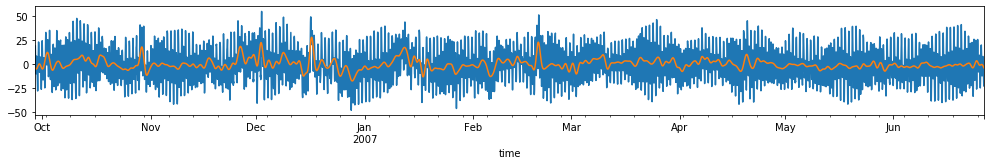

In [4]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(17, 2))

data.U_320.plot()
data.ufdata.plot()


In [5]:
data.to_csv(filename.replace('.csv','_f'+str(filter_h)+'.csv'))

### For Netcdf files
- xarray based
- one folder at atime (TODO: pointer file
- output as nc with all meta data + added history

In [6]:
import xarray as xa
from xarray_extras import csv as xacsv

In [ ]:
#xadata = xa.open_mfdataset('/Users/bell/Desktop/M5/depths/btm/*.cf.nc')

import os
directory = '/Users/bell/Desktop/M5/depths/btm/'
figure=False
dataout=True
for file in sorted(os.listdir(directory)):
    print(file)
    if file.endswith(".cf.nc"): 
        xadata = xa.open_dataset(directory+file)
        try:
            xadata['ufdata'] = lanzcos.lanzcos(xadata.U_320[:,0,0,0],1,35)
            xadata['vfdata'] = lanzcos.lanzcos(xadata.V_321[:,0,0,0],1,35)

            if figure:
                fig, ax = plt.subplots(figsize=(17, 2))
                xadata.U_320.plot()
                ax.plot(xadata.time,xadata.ufdata)   
            if dataout:
                print('time,U_filtered,V_filtered')
                for i,v in enumerate(xadata.time):
                    print(v.values,xadata.ufdata[i].values,xadata.vfdata[i].values)                
        except:
            xadata['ufdata'] = lanzcos.lanzcos(xadata.u_1205[:,0,0,0],1,35)
            xadata['vfdata'] = lanzcos.lanzcos(xadata.v_1206[:,0,0,0],1,35)
            
            if figure:
                fig, ax = plt.subplots(figsize=(17, 2))
                xadata.u_1205.plot()
                ax.plot(xadata.time,xadata.ufdata)
            if dataout:
                print('time,U_filtered,V_filtered')
                for i,v in enumerate(xadata.time):
                    print(v.values,xadata.ufdata[i].values,xadata.vfdata[i].values) 
        
    else:
        continue